In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
# Load the dataset
path='C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 2/telco-customer-churn.csv'
teleco_data=pd.read_csv(path)

In [20]:
# Data Preprocessing
# Convert all categorical features to numeric
label_encoders = {}
for column in teleco_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    teleco_data[column] = le.fit_transform(teleco_data[column].astype(str))
    label_encoders[column] = le

teleco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [21]:
# Basic information about the dataset
print("Dataset Shape:", teleco_data.shape)
print("First few rows:\n", teleco_data.head())

#Missing values check
teleco_data.isnull().sum()

# Impute missing values in the 'TotalCharges' column with the median
imputer = SimpleImputer(strategy='median')
teleco_data['TotalCharges'] = imputer.fit_transform(teleco_data[['TotalCharges']])

Dataset Shape: (7043, 21)
First few rows:
    customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0 

In [22]:
# Summary statistics for numeric columns
print("Descriptive Statistics:\n", teleco_data.describe())

Descriptive Statistics:
         customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000

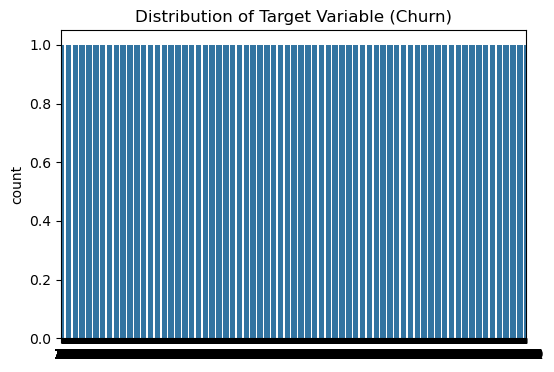

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(teleco_data['Churn'])
plt.title("Distribution of Target Variable (Churn)")
plt.show()


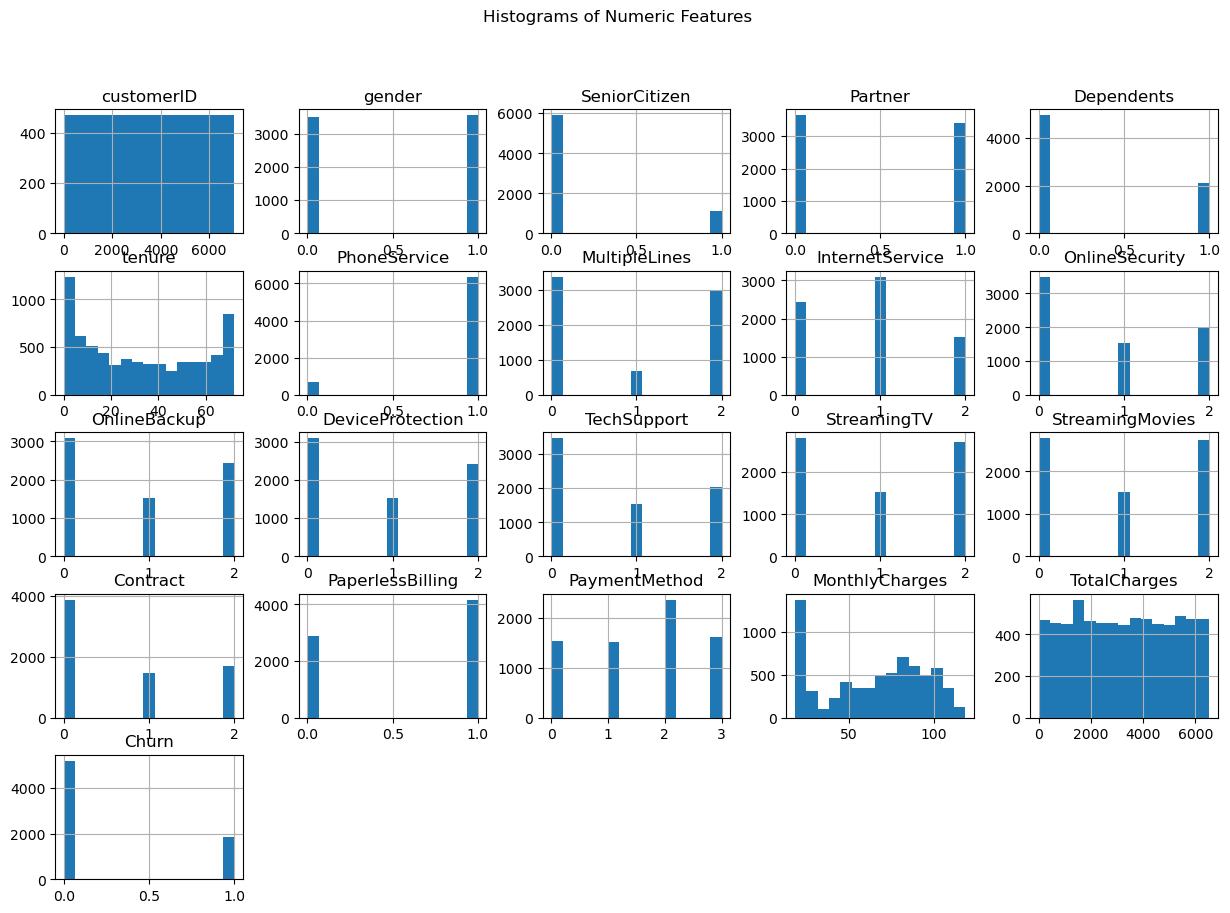

In [30]:
# Histograms for numeric features
teleco_data.hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.suptitle("Histograms of Numeric Features")
plt.show()

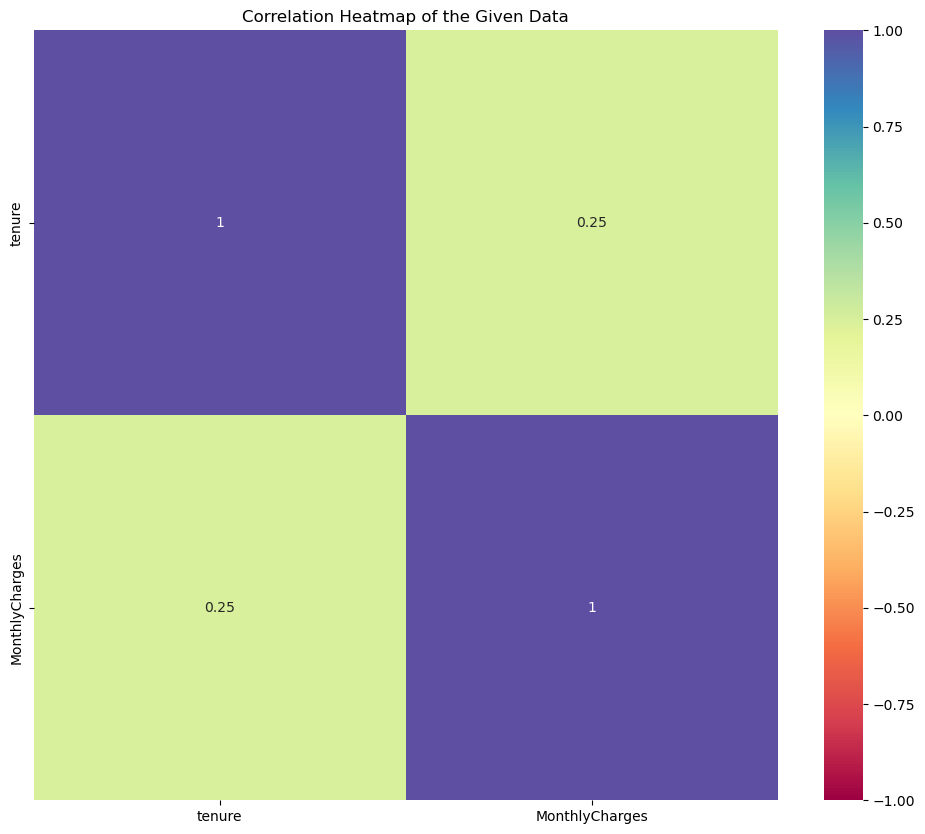

In [9]:
#This is done by using heatmap

# Select numerical columns and drop 'SeniorCitizen'
required_data = teleco_data.select_dtypes(include=['float64', 'int64']).drop('SeniorCitizen', axis=1)

# Compute the correlation matrix
corr_matrix = required_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of the Given Data')
plt.show()

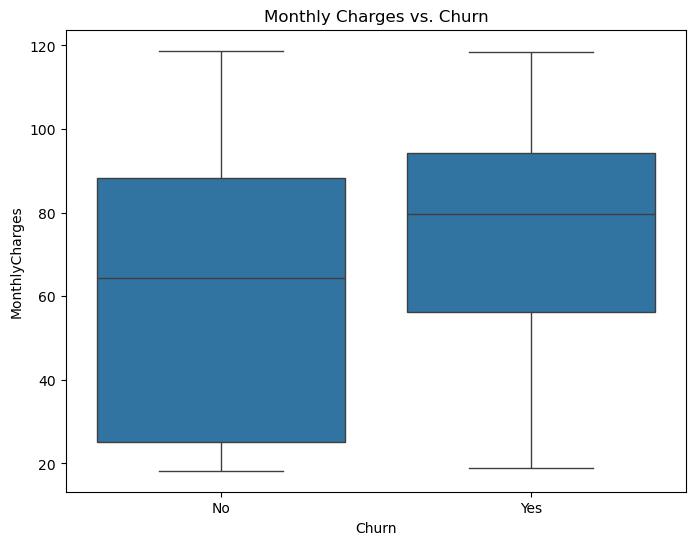

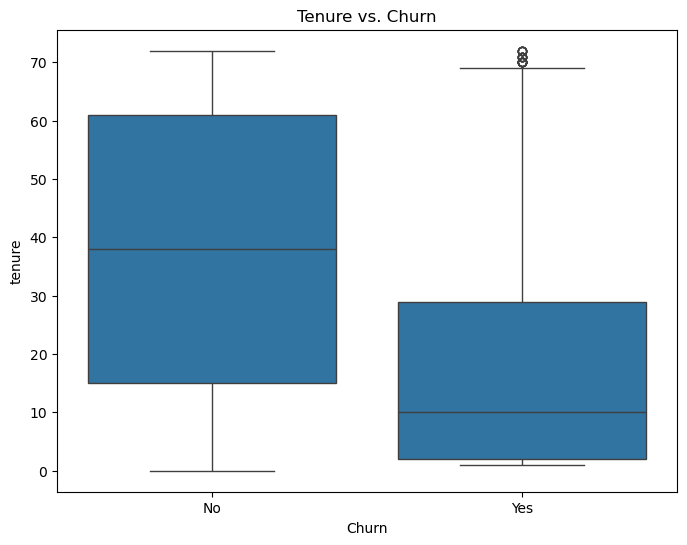

In [11]:
# Boxplot of MonthlyCharges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=teleco_data)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Boxplot of Tenure by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=teleco_data)
plt.title("Tenure vs. Churn")
plt.show()

Features shape: (7043, 19), Target shape: (7043,)
Top 10 Important Features (Mutual Information):
             feature  importance
14          Contract    0.091574
4             tenure    0.076971
8     OnlineSecurity    0.060872
11       TechSupport    0.059060
9       OnlineBackup    0.055694
7    InternetService    0.054400
16     PaymentMethod    0.047912
10  DeviceProtection    0.046260
17    MonthlyCharges    0.045334
18      TotalCharges    0.032643


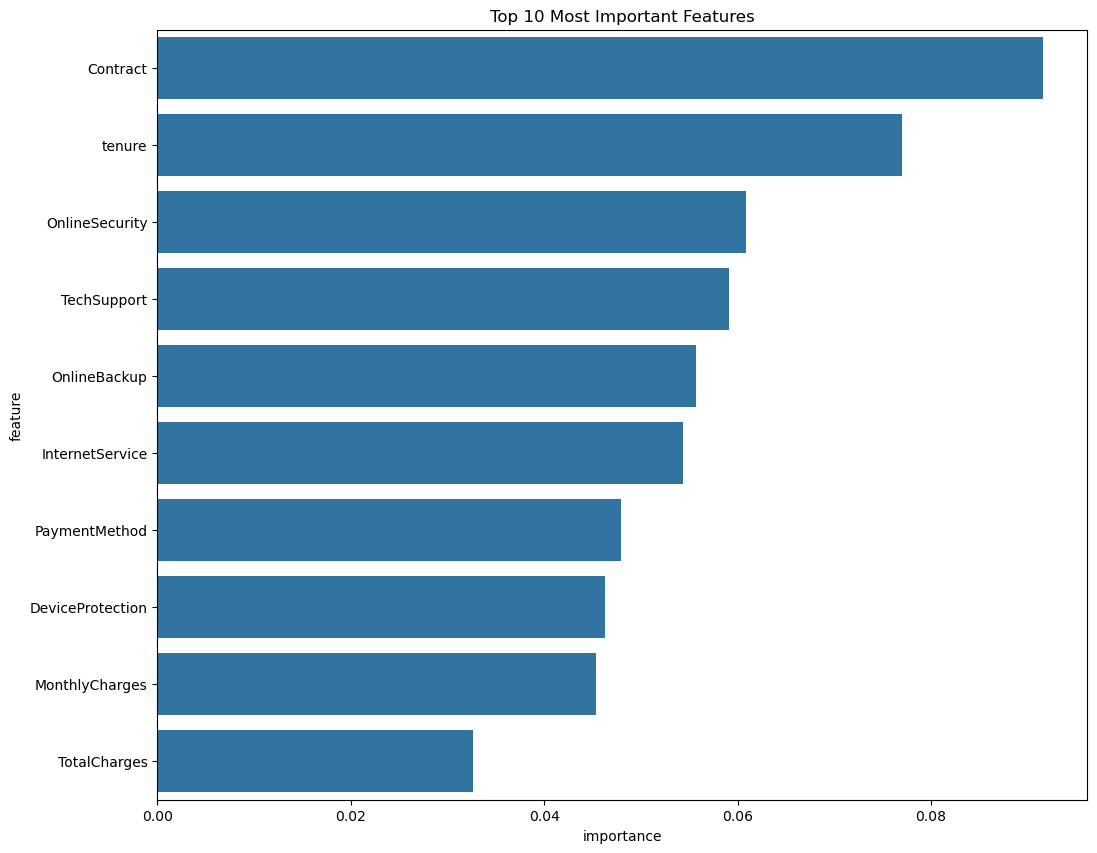

In [12]:
#Feature importance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

#Encoding categorical variables: identifies all object (string) columns and applies label encoding to each
le = LabelEncoder()
categorical_cols = teleco_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    teleco_data[col] = le.fit_transform(teleco_data[col])


# Check for missing values
if teleco_data.isnull().sum().any():
    print("Missing values found. Filling missing values...")
    teleco_data.fillna(0, inplace=True)

#Preparing and seperating features and target
X = teleco_data.drop(['Churn', 'customerID'], axis=1)
y = teleco_data['Churn']

# Check shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

#Calculating Mutual Information:
mi_scores = mutual_info_classif(X, y, random_state=42)

#create feature importance
mi_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': mi_scores})
mi_feature_importance = mi_feature_importance.sort_values('importance', ascending=False)

# Display top 10 most important features
print("Top 10 Important Features (Mutual Information):")
print(mi_feature_importance.head(10))

#Plot feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=mi_feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

In [27]:
# Separate features (X) and target (y)
X = teleco_data.drop('Churn', axis=1)
y = teleco_data['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=[float, int]).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Step 1: Data Imputation for numeric columns (fill with median)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Step 2: Encoding for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 3: Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessor to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Print shapes to confirm preprocessing
print("Training data shape after preprocessing:", X_train_processed.shape)
print("Test data shape after preprocessing:", X_test_processed.shape)


X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)
Training data shape after preprocessing: (5634, 19)
Test data shape after preprocessing: (1409, 19)


In [24]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
# Display the class distribution before and after applying SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution before SMOTE:
 Churn
0    4138
1    1496
Name: count, dtype: int64
Class distribution after SMOTE:
 Churn
0    4138
1    4138
Name: count, dtype: int64


In [30]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 450.6 kB/s eta 0:04:37
   ---------------------------------------- 0.2/124.9 MB 655.9 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 863.3 kB/s eta 0:02:25
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.7/124.9 MB 1.6 MB/s eta 0:01:19
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [39]:
# Apply SMOTE to address data imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # This line ensures SMOTE is applied to the training set

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each model on original and SMOTE data
results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} on original data")
    results[model_name] = evaluate_model(model, X_train, y_train, X_test, y_test)
    print("Accuracy:", results[model_name][0])
    print("Precision:", results[model_name][1])
    print("Recall:", results[model_name][2])
    print("F1 Score:", results[model_name][3])
    
    print(f"\nEvaluating {model_name} on SMOTE data")
    smote_results = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    print("Accuracy (SMOTE):", smote_results[0])
    print("Precision (SMOTE):", smote_results[1])
    print("Recall (SMOTE):", smote_results[2])
    print("F1 Score (SMOTE):", smote_results[3])

# Summarize results in a DataFrame for easier comparison
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print("\nModel performance on original data:")
print(results_df)


Evaluating Naive Bayes on original data
Accuracy: 0.758694109297374
Precision: 0.5302752293577981
Recall: 0.774798927613941
F1 Score: 0.6296296296296297

Evaluating Naive Bayes on SMOTE data
Accuracy (SMOTE): 0.7544357700496807
Precision (SMOTE): 0.525911708253359
Recall (SMOTE): 0.7345844504021448
F1 Score (SMOTE): 0.6129753914988815

Evaluating Logistic Regression on original data


C:\Users\harin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8176011355571328
Precision: 0.6870967741935484
Recall: 0.5710455764075067
F1 Score: 0.623718887262079

Evaluating Logistic Regression on SMOTE data


C:\Users\harin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (SMOTE): 0.7735982966643009
Precision (SMOTE): 0.5517241379310345
Recall (SMOTE): 0.7721179624664879
F1 Score (SMOTE): 0.6435754189944134

Evaluating Random Forest on original data
Accuracy: 0.7984386089425124
Precision: 0.663003663003663
Recall: 0.48525469168900803
F1 Score: 0.5603715170278638

Evaluating Random Forest on SMOTE data
Accuracy (SMOTE): 0.7743080198722498
Precision (SMOTE): 0.5737265415549598
Recall (SMOTE): 0.5737265415549598
F1 Score (SMOTE): 0.5737265415549598

Evaluating XGBoost on original data


C:\Users\harin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:43:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7927608232789212
Precision: 0.6253869969040248
Recall: 0.5415549597855228
F1 Score: 0.5804597701149425

Evaluating XGBoost on SMOTE data


C:\Users\harin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:43:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (SMOTE): 0.7814052519517388
Precision (SMOTE): 0.583547557840617
Recall (SMOTE): 0.6085790884718498
F1 Score (SMOTE): 0.5958005249343832

Model performance on original data:
                     Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.758694   0.530275  0.774799  0.629630
Logistic Regression  0.817601   0.687097  0.571046  0.623719
Random Forest        0.798439   0.663004  0.485255  0.560372
XGBoost              0.792761   0.625387  0.541555  0.580460



Evaluating Naive Bayes on original data
Accuracy: 0.758694109297374
Precision: 0.5302752293577981
Recall: 0.774798927613941
F1 Score: 0.6296296296296297


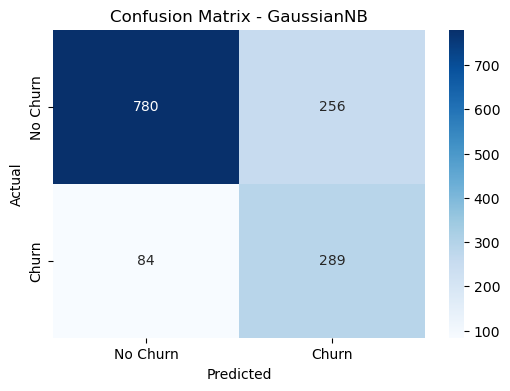


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.75      0.82      1036
       Churn       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409


Evaluating Naive Bayes on SMOTE data
Accuracy: 0.7544357700496807
Precision: 0.525911708253359
Recall: 0.7345844504021448
F1 Score: 0.6129753914988815


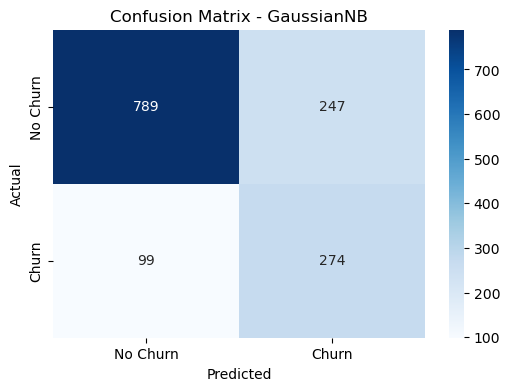


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.76      0.82      1036
       Churn       0.53      0.73      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.77      1409


Evaluating Logistic Regression on original data


C:\Users\harin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8176011355571328
Precision: 0.6870967741935484
Recall: 0.5710455764075067
F1 Score: 0.623718887262079


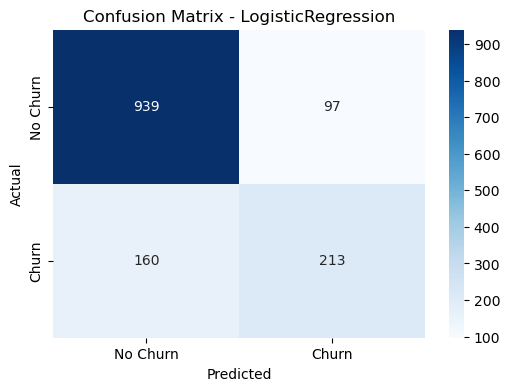


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.91      0.88      1036
       Churn       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Evaluating Logistic Regression on SMOTE data


C:\Users\harin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7735982966643009
Precision: 0.5517241379310345
Recall: 0.7721179624664879
F1 Score: 0.6435754189944134


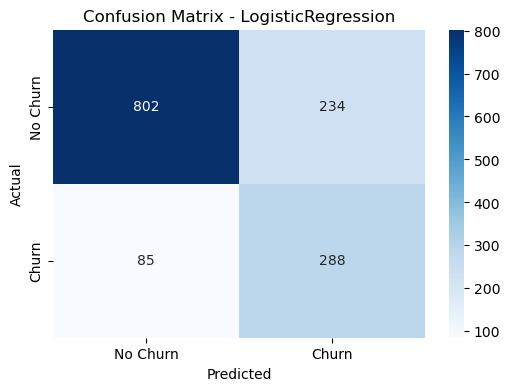


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.77      0.83      1036
       Churn       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409


Evaluating Random Forest on original data
Accuracy: 0.7984386089425124
Precision: 0.663003663003663
Recall: 0.48525469168900803
F1 Score: 0.5603715170278638


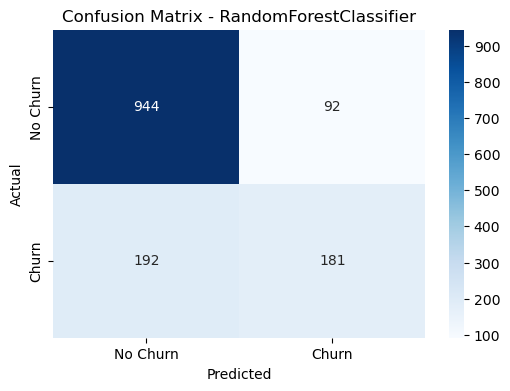


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1036
       Churn       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Evaluating Random Forest on SMOTE data
Accuracy: 0.7743080198722498
Precision: 0.5737265415549598
Recall: 0.5737265415549598
F1 Score: 0.5737265415549598


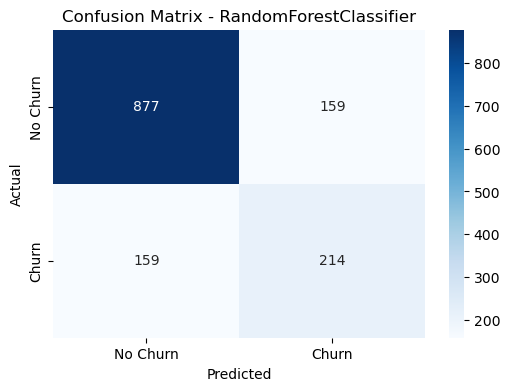


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.85      0.85      1036
       Churn       0.57      0.57      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409


Evaluating XGBoost on original data


C:\Users\harin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:48:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7927608232789212
Precision: 0.6253869969040248
Recall: 0.5415549597855228
F1 Score: 0.5804597701149425


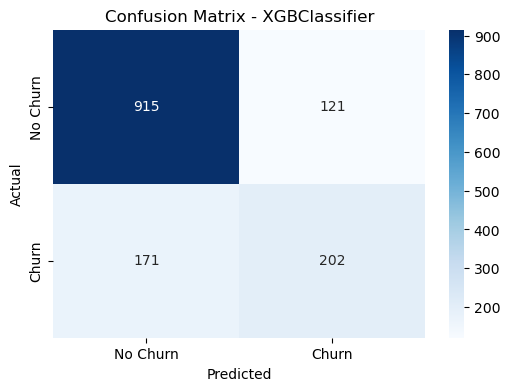


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86      1036
       Churn       0.63      0.54      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409


Evaluating XGBoost on SMOTE data


C:\Users\harin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7814052519517388
Precision: 0.583547557840617
Recall: 0.6085790884718498
F1 Score: 0.5958005249343832


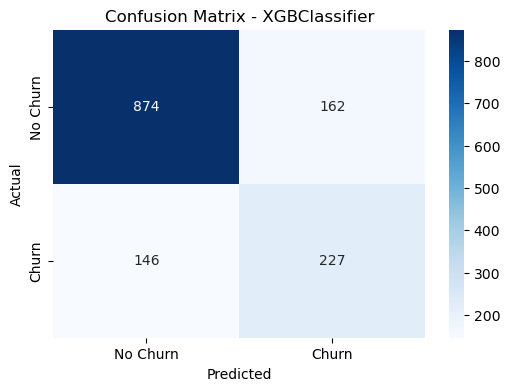


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.84      0.85      1036
       Churn       0.58      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [40]:
# Import necessary libraries for evaluation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to evaluate and display metrics
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Display metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Evaluate models on original and SMOTE data
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} on original data")
    model.fit(X_train, y_train)  # Train on original data
    evaluate_model_performance(model, X_test, y_test)
    
    print(f"\nEvaluating {model_name} on SMOTE data")
    model.fit(X_train_smote, y_train_smote)  # Train on SMOTE data
    evaluate_model_performance(model, X_test, y_test)


In [41]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0]
    }
}

# Dictionary to store the best models
best_models = {}

# Function to perform Grid Search with cross-validation
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Recall Score:", grid_search.best_score_)
    return grid_search.best_estimator_

# Tune Logistic Regression
print("\nTuning Logistic Regression")
best_lr = tune_hyperparameters(LogisticRegression(max_iter=1000, random_state=42), param_grids['Logistic Regression'], X_train_smote, y_train_smote)
best_models['Logistic Regression'] = best_lr

# Tune Random Forest
print("\nTuning Random Forest")
best_rf = tune_hyperparameters(RandomForestClassifier(random_state=42), param_grids['Random Forest'], X_train_smote, y_train_smote)
best_models['Random Forest'] = best_rf

# Tune XGBoost
print("\nTuning XGBoost")
best_xgb = tune_hyperparameters(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grids['XGBoost'], X_train_smote, y_train_smote)
best_models['XGBoost'] = best_xgb

# Display best models and parameters
print("\nBest Models and Parameters:")
for model_name, best_model in best_models.items():
    print(f"{model_name} - Best Params: {best_model.get_params()}")



Tuning Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\harin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Recall Score: 0.8276843138285754

Tuning Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.8559621237345857

Tuning XGBoost
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\harin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:54:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best Recall Score: 0.8564490124949617

Best Models and Parameters:
Logistic Regression - Best Params: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Random Forest - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
XGBoost - Best Params: {'objective': 'binary:logistic', 'base_score': None, 'booster